In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV , train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error , mean_absolute_error
import datetime
import operator
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline


In [85]:
# The code was removed by Watson Studio for sharing.

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,53,59,70,75,82,114,147,177,212,272
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,581,639,639,701,773,839,825,878,889,924
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,160,178,178,200,212,226,243,266,313,345
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,129,149,149,197,238,428,566,673,790,900


In [86]:

body = client_9e4b92959aaf4bd9a508c93780d835eb.get_object(Bucket='covid19outbreakpredictiondataanal-donotdelete-pr-soyicnqkzzgpef',Key='time_series_covid_19_deaths.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df2 = pd.read_csv(body)
df2.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,10,15,16,19,22,22,27,29,29,29
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2


In [87]:

body = client_9e4b92959aaf4bd9a508c93780d835eb.get_object(Bucket='covid19outbreakpredictiondataanal-donotdelete-pr-soyicnqkzzgpef',Key='time_series_covid_19_recovered.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df3 = pd.read_csv(body)
df3.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,33,34,34,35,35,35,35,41,42,42
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,101,118,118,118,118,118,144,144,144,150
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,78,96,96,97,105,105,109,114,114,114
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,24,26,26,26,35,42,42,49,60,75


In [88]:
df1

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,53,59,70,75,82,114,147,177,212,272
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,581,639,639,701,773,839,825,878,889,924
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,160,178,178,200,212,226,243,266,313,345
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,129,149,149,197,238,428,566,673,790,900
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,32,39,46,64,64,73,103,103,186,231
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,55,65,65,92,112,134,171,210,267,307
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,18,21,21,36,49,57,71,94,121,121
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,18,20,20,35,46,61,68,78,94,144
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,1,...,2,3,3,5,7,7,7,33,35,37


In [89]:
df1

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,53,59,70,75,82,114,147,177,212,272
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,581,639,639,701,773,839,825,878,889,924
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,160,178,178,200,212,226,243,266,313,345
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,129,149,149,197,238,428,566,673,790,900
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,32,39,46,64,64,73,103,103,186,231
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,55,65,65,92,112,134,171,210,267,307
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,18,21,21,36,49,57,71,94,121,121
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,18,20,20,35,46,61,68,78,94,144
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,1,...,2,3,3,5,7,7,7,33,35,37


In [90]:
#Extracting all the columns using the .key() function
cols = df1.keys()

In [91]:
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20'],
      dtype='object')

In [92]:
confirmed = df1.loc[:, cols[4]:cols[-1]]

In [93]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,2,3,5,7,8,8,14,14,14,19,...,53,59,70,75,82,114,147,177,212,272
1,2,1,2,2,4,4,7,7,11,15,...,581,639,639,701,773,839,825,878,889,924
2,0,1,3,3,4,5,7,7,10,13,...,160,178,178,200,212,226,243,266,313,345
3,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,3,4,4,4,7,8,8,...,129,149,149,197,238,428,566,673,790,900
5,0,0,0,0,0,0,1,1,1,1,...,32,39,46,64,64,73,103,103,186,231
6,0,0,0,0,3,4,4,4,4,4,...,55,65,65,92,112,134,171,210,267,307
7,0,0,0,0,1,1,1,1,2,3,...,18,21,21,36,49,57,71,94,121,121
8,0,0,0,0,0,0,0,1,3,2,...,18,20,20,35,46,61,68,78,94,144
9,0,0,0,0,0,1,1,1,1,1,...,2,3,3,5,7,7,7,33,35,37


In [94]:
deaths = df2.loc[:, cols[4]:cols[-1]]
deaths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,10,15,16,19,22,22,27,29,29,29
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2
5,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,4,4,7,7
6,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,4,5,5
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
recoveries = df3.loc[:, cols[4]:cols[-1]]
recoveries

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,0,0,0,0,2,2,5,5,5,5,...,33,34,34,35,35,35,35,41,42,42
1,0,0,0,0,1,1,1,1,1,1,...,101,118,118,118,118,118,144,144,144,150
2,0,0,0,0,0,0,0,0,0,0,...,78,96,96,97,105,105,109,114,114,114
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,24,26,26,26,35,42,42,49,60,75
5,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
6,0,0,0,0,0,0,0,0,2,2,...,4,4,4,4,4,4,4,4,4,4
7,0,0,0,0,0,0,0,0,0,0,...,7,7,7,8,8,8,8,8,8,8
8,0,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
9,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [96]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,2,3,5,7,8,8,14,14,14,19,...,53,59,70,75,82,114,147,177,212,272
1,2,1,2,2,4,4,7,7,11,15,...,581,639,639,701,773,839,825,878,889,924
2,0,1,3,3,4,5,7,7,10,13,...,160,178,178,200,212,226,243,266,313,345
3,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,3,4,4,4,7,8,8,...,129,149,149,197,238,428,566,673,790,900


In [97]:
#Finding the total confrimed cases, deaths cases and the recovered cases and append them to an 4 empty listss
#Also calculate the total mortality rate which is the death_sum/confrimed

dates = confirmed.keys()
world_cases = []

total_deaths = []
mortality_rate = []
total_recovered = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)
    

In [98]:
confirmed_sum

242708

In [99]:
death_sum

9867

In [100]:
recovered_sum

84854

In [101]:
world_cases

[555,
 653,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30817,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76823,
 78579,
 78965,
 79568,
 80413,
 81395,
 82754,
 84120,
 86011,
 88369,
 90306,
 92840,
 95120,
 97882,
 101784,
 105821,
 109795,
 113561,
 118592,
 125865,
 128343,
 145193,
 156094,
 167446,
 181527,
 197142,
 214910,
 242708]

In [102]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [103]:
days_since_1_22

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57]])

In [104]:
world_cases

array([[   555],
       [   653],
       [   941],
       [  1434],
       [  2118],
       [  2927],
       [  5578],
       [  6166],
       [  8234],
       [  9927],
       [ 12038],
       [ 16787],
       [ 19881],
       [ 23892],
       [ 27635],
       [ 30817],
       [ 34391],
       [ 37120],
       [ 40150],
       [ 42762],
       [ 44802],
       [ 45221],
       [ 60368],
       [ 66885],
       [ 69030],
       [ 71224],
       [ 73258],
       [ 75136],
       [ 75639],
       [ 76197],
       [ 76823],
       [ 78579],
       [ 78965],
       [ 79568],
       [ 80413],
       [ 81395],
       [ 82754],
       [ 84120],
       [ 86011],
       [ 88369],
       [ 90306],
       [ 92840],
       [ 95120],
       [ 97882],
       [101784],
       [105821],
       [109795],
       [113561],
       [118592],
       [125865],
       [128343],
       [145193],
       [156094],
       [167446],
       [181527],
       [197142],
       [214910],
       [242708]])

In [105]:
total_deaths

array([[  17],
       [  18],
       [  26],
       [  42],
       [  56],
       [  82],
       [ 131],
       [ 133],
       [ 171],
       [ 213],
       [ 259],
       [ 362],
       [ 426],
       [ 492],
       [ 564],
       [ 634],
       [ 719],
       [ 806],
       [ 906],
       [1013],
       [1113],
       [1118],
       [1371],
       [1523],
       [1666],
       [1770],
       [1868],
       [2007],
       [2122],
       [2247],
       [2251],
       [2458],
       [2469],
       [2629],
       [2708],
       [2770],
       [2814],
       [2872],
       [2941],
       [2996],
       [3085],
       [3160],
       [3254],
       [3348],
       [3460],
       [3558],
       [3802],
       [3988],
       [4262],
       [4615],
       [4720],
       [5404],
       [5819],
       [6440],
       [7126],
       [7905],
       [8733],
       [9867]])

In [106]:
total_recovered

array([[   28],
       [   30],
       [   36],
       [   39],
       [   52],
       [   61],
       [  107],
       [  126],
       [  143],
       [  222],
       [  284],
       [  472],
       [  623],
       [  852],
       [ 1124],
       [ 1487],
       [ 2011],
       [ 2616],
       [ 3244],
       [ 3946],
       [ 4683],
       [ 5150],
       [ 6295],
       [ 8058],
       [ 9395],
       [10865],
       [12583],
       [14352],
       [16121],
       [18177],
       [18890],
       [22886],
       [23394],
       [25227],
       [27905],
       [30384],
       [33277],
       [36711],
       [39782],
       [42716],
       [45602],
       [48228],
       [51170],
       [53796],
       [55865],
       [58358],
       [60694],
       [62494],
       [64404],
       [67003],
       [68324],
       [70251],
       [72624],
       [76034],
       [78088],
       [80840],
       [83207],
       [84854]])

In [107]:
days_in_future = 30
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-30]

In [108]:
future_forecast

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],

In [109]:
#Convert all the integers into datetime for better visualization

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [110]:
# For visualization with the latest data of 15th of march


latest_confirmed = df1[dates[-1]]
latest_deaths = df2[dates[-1]]
latest_recoveries = df3[dates[-1]]


In [111]:
latest_confirmed

0        272
1        924
2        345
3          1
4        900
5        231
6        307
7        121
8        144
9         37
10        60
11     15320
12       400
13       140
14       217
15       194
16     41035
17      1439
18     17963
19        42
20      1795
21       256
22         0
23       157
24       192
25        48
26        22
27       278
28       148
29        87
       ...  
438        3
439       23
440     2460
441       14
442       33
443        2
444        2
445        3
446        1
447        6
448        3
449        3
450       14
451        5
452        3
453        3
454        3
455        4
456        2
457        1
458        1
459        1
460        3
461        2
462        2
463        2
464        1
465        1
466        1
467        1
Name: 3/19/20, Length: 468, dtype: int64

In [112]:
latest_deaths 

0         1
1        29
2         0
3         0
4         2
5         7
6         5
7         0
8         0
9         0
10        0
11       44
12        0
13        0
14       17
15        4
16     3405
17       11
18      830
19        0
20       21
21        6
22        0
23        4
24       13
25        0
26        0
27        1
28        0
29        9
       ... 
438       0
439       0
440      76
441       0
442       0
443       0
444       0
445       1
446       0
447       0
448       0
449       1
450       0
451       0
452       0
453       0
454       0
455       0
456       0
457       0
458       0
459       0
460       0
461       0
462       0
463       0
464       0
465       0
466       0
467       0
Name: 3/19/20, Length: 468, dtype: int64

In [113]:
latest_recoveries

0        42
1       150
2       114
3         1
4        75
5         4
6         4
7         8
8         8
9         1
10        3
11      113
12       10
13       31
14        8
15       15
16     4440
17       16
18     1107
19        3
20       31
21       32
22        0
23        4
24       43
25       12
26        1
27      100
28       18
29       32
       ... 
438       0
439       0
440       2
441       0
442       0
443       0
444       0
445       0
446       0
447       0
448       0
449       0
450       0
451       0
452       0
453       0
454       0
455       0
456       0
457       0
458       0
459       0
460       0
461       0
462       0
463       0
464       0
465       0
466       0
467       0
Name: 3/19/20, Length: 468, dtype: int64

In [114]:
unique_countries = list(df1['Country/Region'].unique())
unique_countries

['Thailand',
 'Japan',
 'Singapore',
 'Nepal',
 'Malaysia',
 'Canada',
 'Australia',
 'Cambodia',
 'Sri Lanka',
 'Germany',
 'Finland',
 'United Arab Emirates',
 'Philippines',
 'India',
 'Italy',
 'Sweden',
 'Spain',
 'Belgium',
 'Egypt',
 'Lebanon',
 'Iraq',
 'Oman',
 'Afghanistan',
 'Bahrain',
 'Kuwait',
 'Algeria',
 'Croatia',
 'Switzerland',
 'Austria',
 'Israel',
 'Pakistan',
 'Brazil',
 'Georgia',
 'Greece',
 'North Macedonia',
 'Norway',
 'Romania',
 'Estonia',
 'San Marino',
 'Belarus',
 'Iceland',
 'Lithuania',
 'Mexico',
 'New Zealand',
 'Nigeria',
 'Ireland',
 'Luxembourg',
 'Monaco',
 'Qatar',
 'Ecuador',
 'Azerbaijan',
 'Armenia',
 'Dominican Republic',
 'Indonesia',
 'Portugal',
 'Andorra',
 'Latvia',
 'Morocco',
 'Saudi Arabia',
 'Senegal',
 'Argentina',
 'Chile',
 'Jordan',
 'Ukraine',
 'Hungary',
 'Liechtenstein',
 'Poland',
 'Tunisia',
 'Bosnia and Herzegovina',
 'Slovenia',
 'South Africa',
 'Bhutan',
 'Cameroon',
 'Colombia',
 'Costa Rica',
 'Peru',
 'Serbia',
 'Sl

In [115]:
# The total number of confrimed cases by each country

country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[df1['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
            
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k,v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)] 
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[df1['Country/Region']==unique_countries[i]].sum()
    

In [116]:
#Number of cases per Country/Region

print('Confirmed cases by Country/Region:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed cases by Country/Region:
China: 81156 cases
Italy: 41035 cases
Iran: 18407 cases
Spain: 17963 cases
Germany: 15320 cases
US: 13677 cases
France: 10947 cases
Korea, South: 8565 cases
Switzerland: 4075 cases
United Kingdom: 2716 cases
Netherlands: 2467 cases
Austria: 2013 cases
Belgium: 1795 cases
Norway: 1746 cases
Sweden: 1439 cases
Denmark: 1225 cases
Japan: 924 cases
Malaysia: 900 cases
Canada: 800 cases
Portugal: 785 cases
Cruise Ship: 712 cases
Czechia: 694 cases
Australia: 681 cases
Israel: 677 cases
Brazil: 621 cases
Ireland: 557 cases
Qatar: 460 cases
Pakistan: 454 cases
Greece: 418 cases
Finland: 400 cases
Poland: 355 cases
Singapore: 345 cases
Luxembourg: 335 cases
Iceland: 330 cases
Indonesia: 311 cases
Slovenia: 286 cases
Bahrain: 278 cases
Romania: 277 cases
Saudi Arabia: 274 cases
Thailand: 272 cases
Estonia: 267 cases
Egypt: 256 cases
Chile: 238 cases
Peru: 234 cases
Philippines: 217 cases
Ecuador: 199 cases
Russia: 199 cases
India: 194 cases
Iraq: 192 cases
Tur

In [117]:
from sklearn.model_selection import train_test_split

X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22,world_cases, test_size=0.15,shuffle=False)

In [118]:
#Find the list of unique provinces

unique_provinces = list(df1['Province/State'].unique())
outliers =['United Kingdom', 'Denmark', 'France']
for i in outliers:
    unique_provinces.remove(i)



In [119]:
# Finding the number of confirmed cases per provinces


province_confirmed_cases = []
no_cases = []
for i in unique_provinces:
    cases = latest_confirmed[df1['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
            
for i in no_cases:
    unique_provinces.remove(i)

In [120]:
for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]}, cases')

British Columbia: 231, cases
New South Wales: 307, cases
Victoria: 121, cases
Queensland: 144, cases
South Australia: 42, cases
Western Australia: 52, cases
Tasmania: 10, cases
Northern Territory: 1, cases
Ontario: 257, cases
Alberta: 119, cases
Quebec: 121, cases
Washington: 1376, cases
New York: 5365, cases
California: 952, cases
Massachusetts: 328, cases
Diamond Princess: 759, cases
Grand Princess: 31, cases
Georgia: 287, cases
Colorado: 277, cases
Florida: 417, cases
New Jersey: 742, cases
Oregon: 88, cases
Texas: 260, cases
Illinois: 422, cases
Pennsylvania: 206, cases
Iowa: 44, cases
Maryland: 107, cases
North Carolina: 123, cases
South Carolina: 81, cases
Tennessee: 154, cases
Virginia: 99, cases
Arizona: 45, cases
Indiana: 60, cases
Kentucky: 37, cases
District of Columbia: 40, cases
Nevada: 95, cases
New Hampshire: 44, cases
Minnesota: 89, cases
Nebraska: 29, cases
Ohio: 119, cases
Rhode Island: 44, cases
Wisconsin: 159, cases
Connecticut: 159, cases
Hawaii: 16, cases
Oklahoma

In [121]:
# handling NaN values

nan_indices = []

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)
        
unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

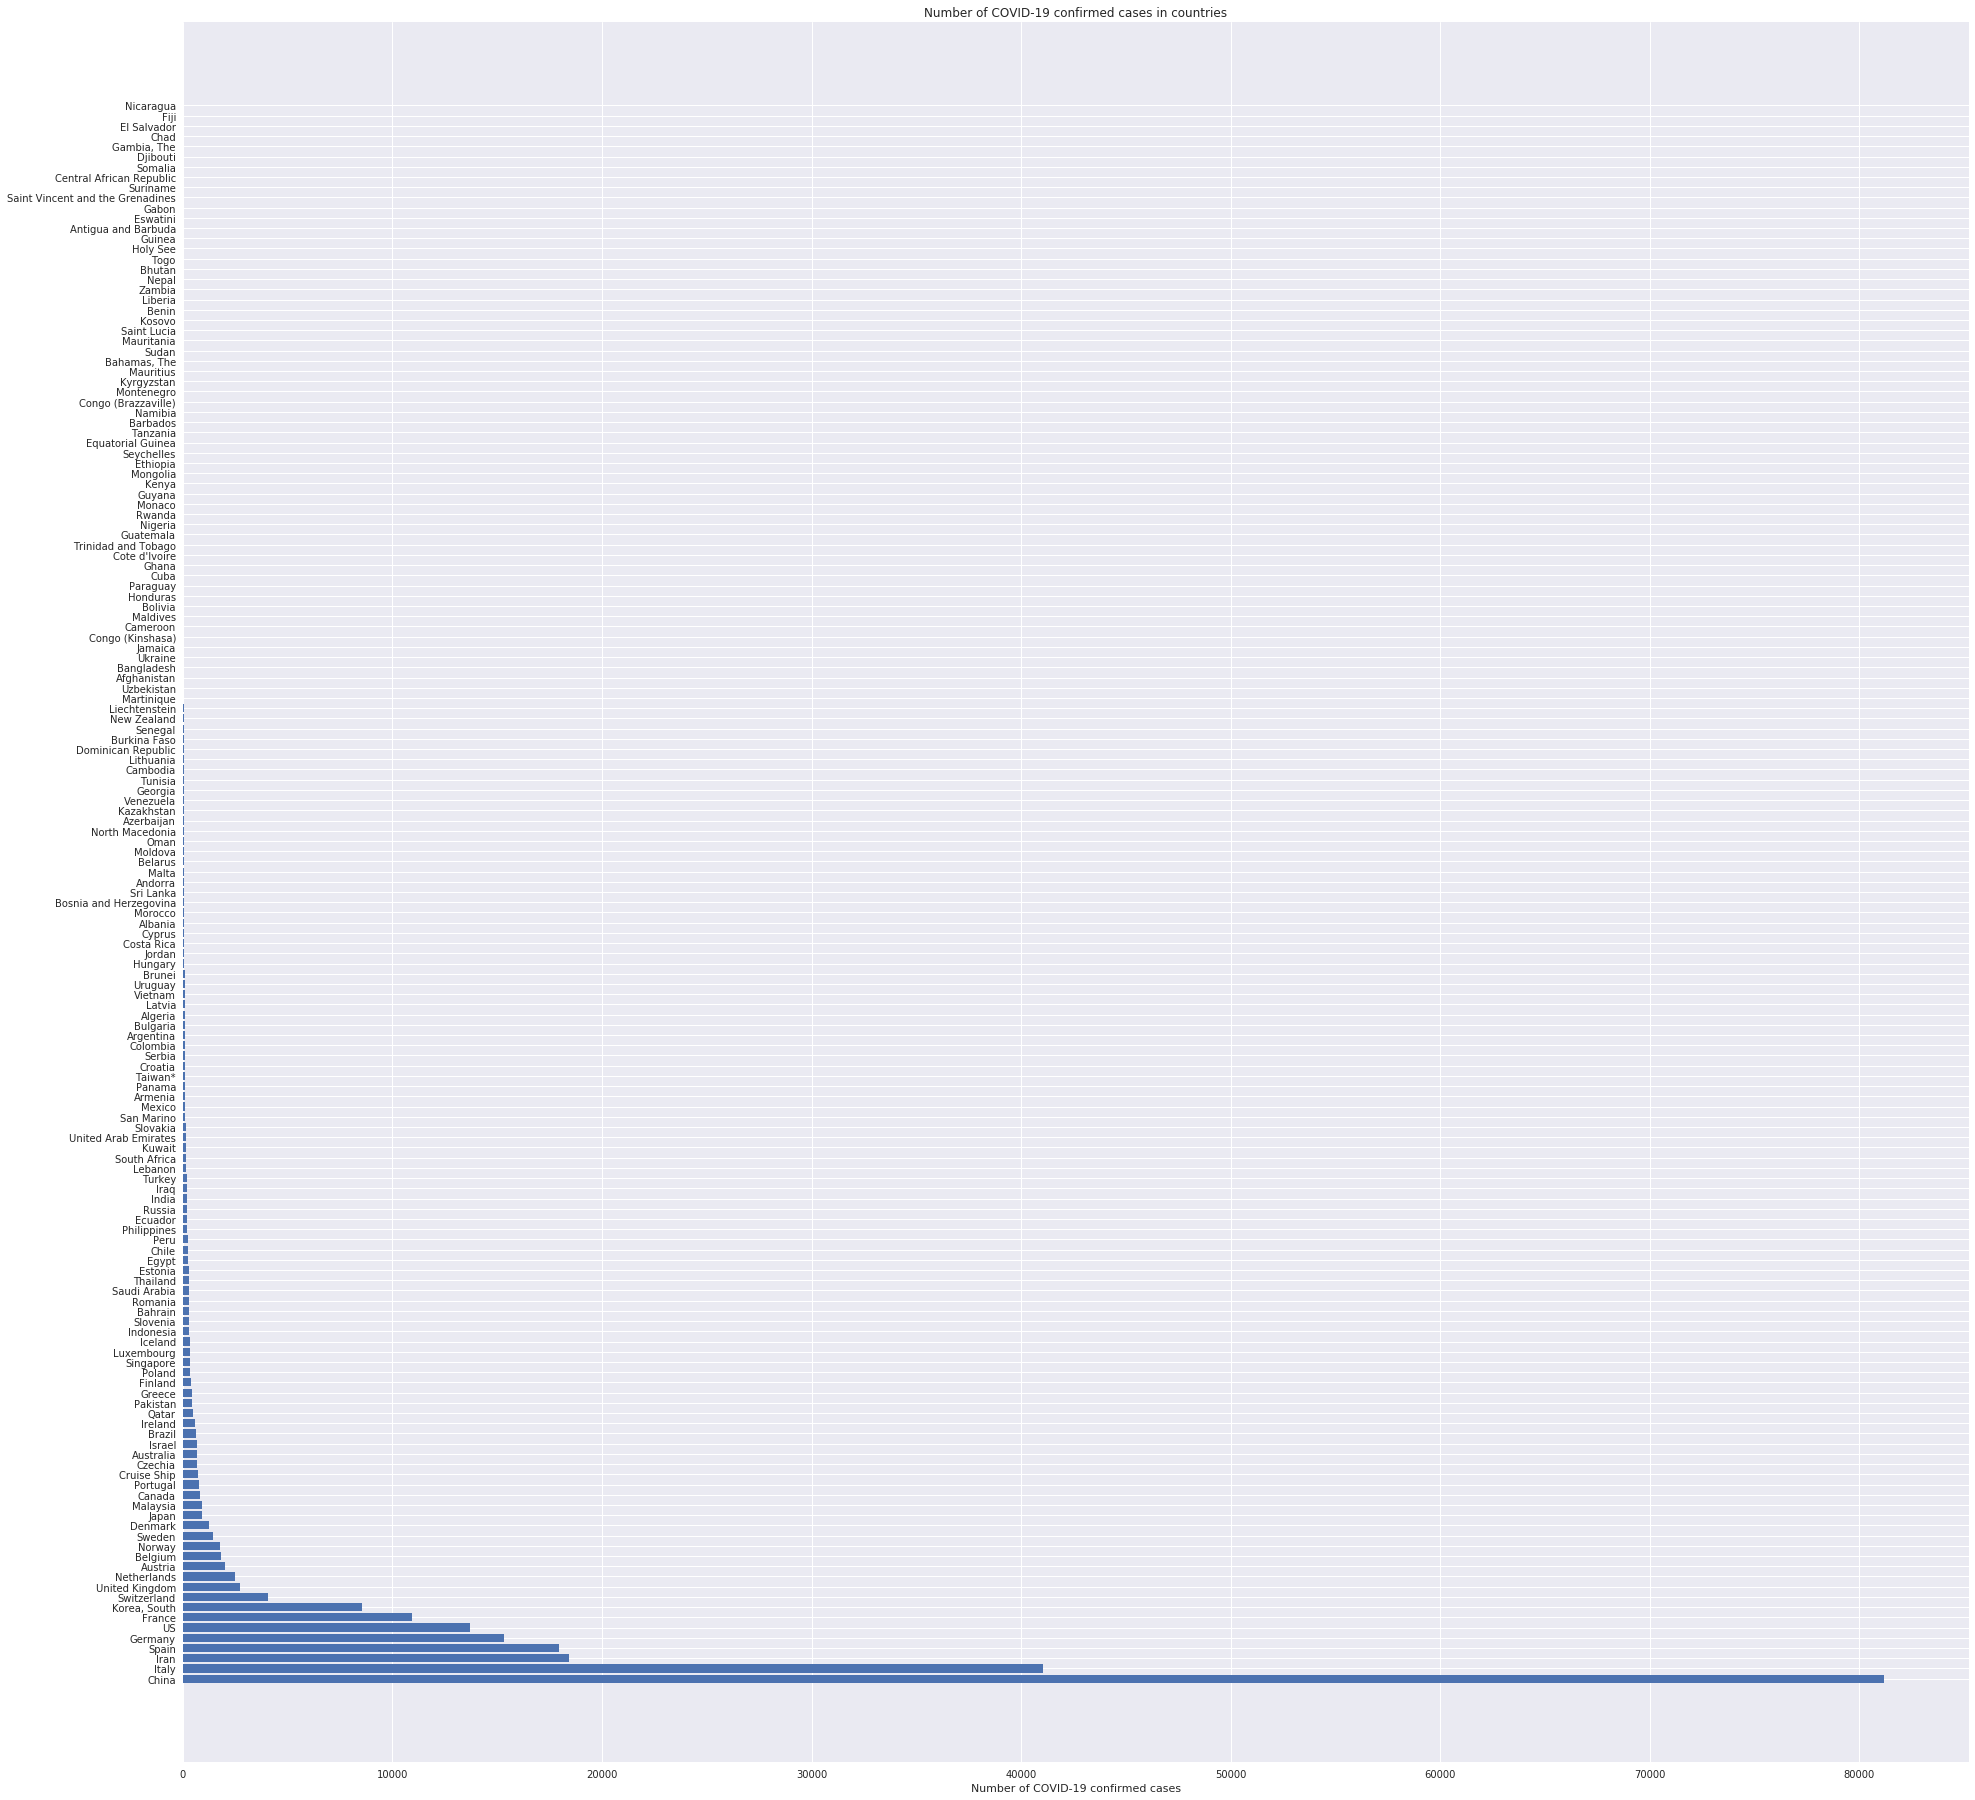

In [122]:
# Plot a bar graph to see the total confirmed casesacross different countries

plt.figure(figsize=(32,32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of COVID-19 confirmed cases in countries')
plt.xlabel('Number of COVID-19 confirmed cases')
plt.show()

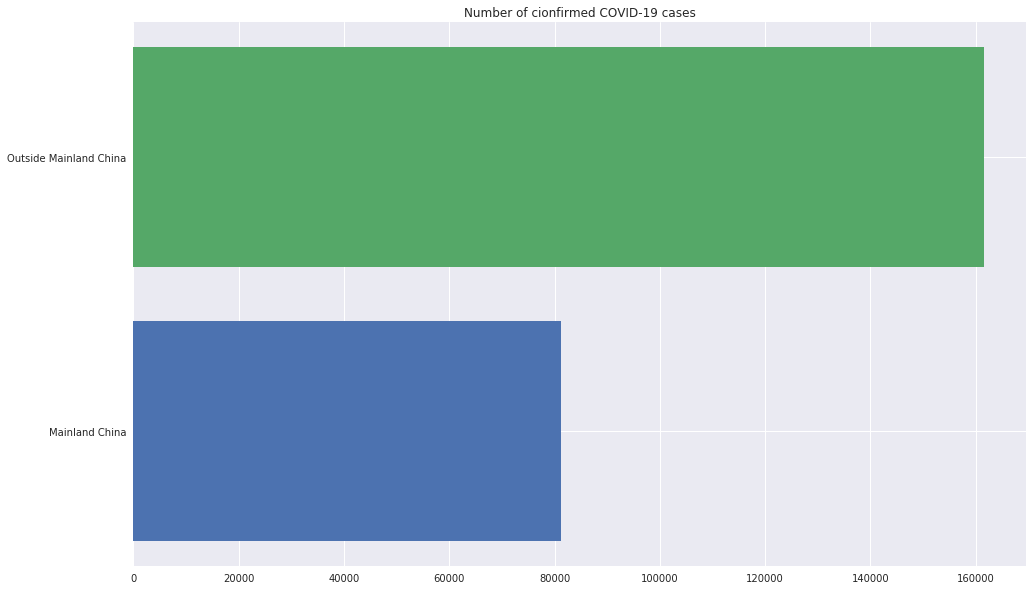

In [123]:
# plot a bar graph to see the total confirmed cases between mainland china and outside mainland china

china_confirmed = latest_confirmed[df1['Country/Region']=='China'].sum()
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
plt.figure(figsize=(16,10))
plt.barh('Mainland China', china_confirmed)
plt.barh('Outside Mainland China', outside_mainland_china_confirmed)
plt.title('Number of cionfirmed COVID-19 cases')
plt.show()

In [124]:
print('Outside Mainland china {} cases'.format(outside_mainland_china_confirmed))
print('Mainland china: {} cases'.format(china_confirmed))
print('Total: {} cases'.format(china_confirmed+outside_mainland_china_confirmed))

Outside Mainland china 161552 cases
Mainland china: 81156 cases
Total: 242708 cases


In [125]:
# only show 10 countries with the most confirmed cases

visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('others')
visual_confirmed_cases.append(others)

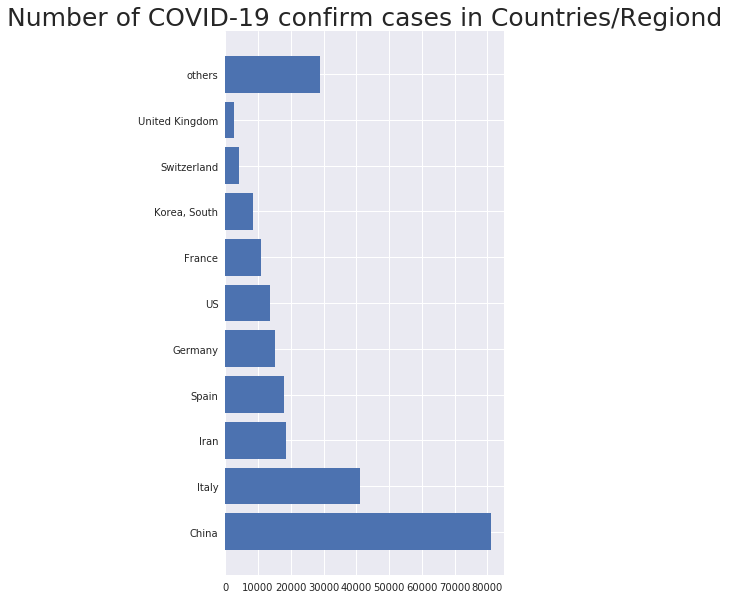

In [126]:
# visualize the 10 countries 

plt.figure(figsize=(5,10))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of COVID-19 confirm cases in Countries/Regiond', size=25)
plt.show()

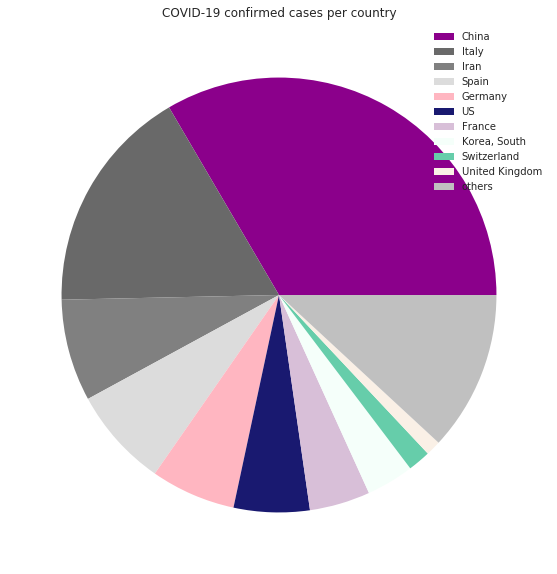

In [127]:
# create a pie chart to see the total confirmed cases in 10 different countries

c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(10,10))
plt.title('COVID-19 confirmed cases per country')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()

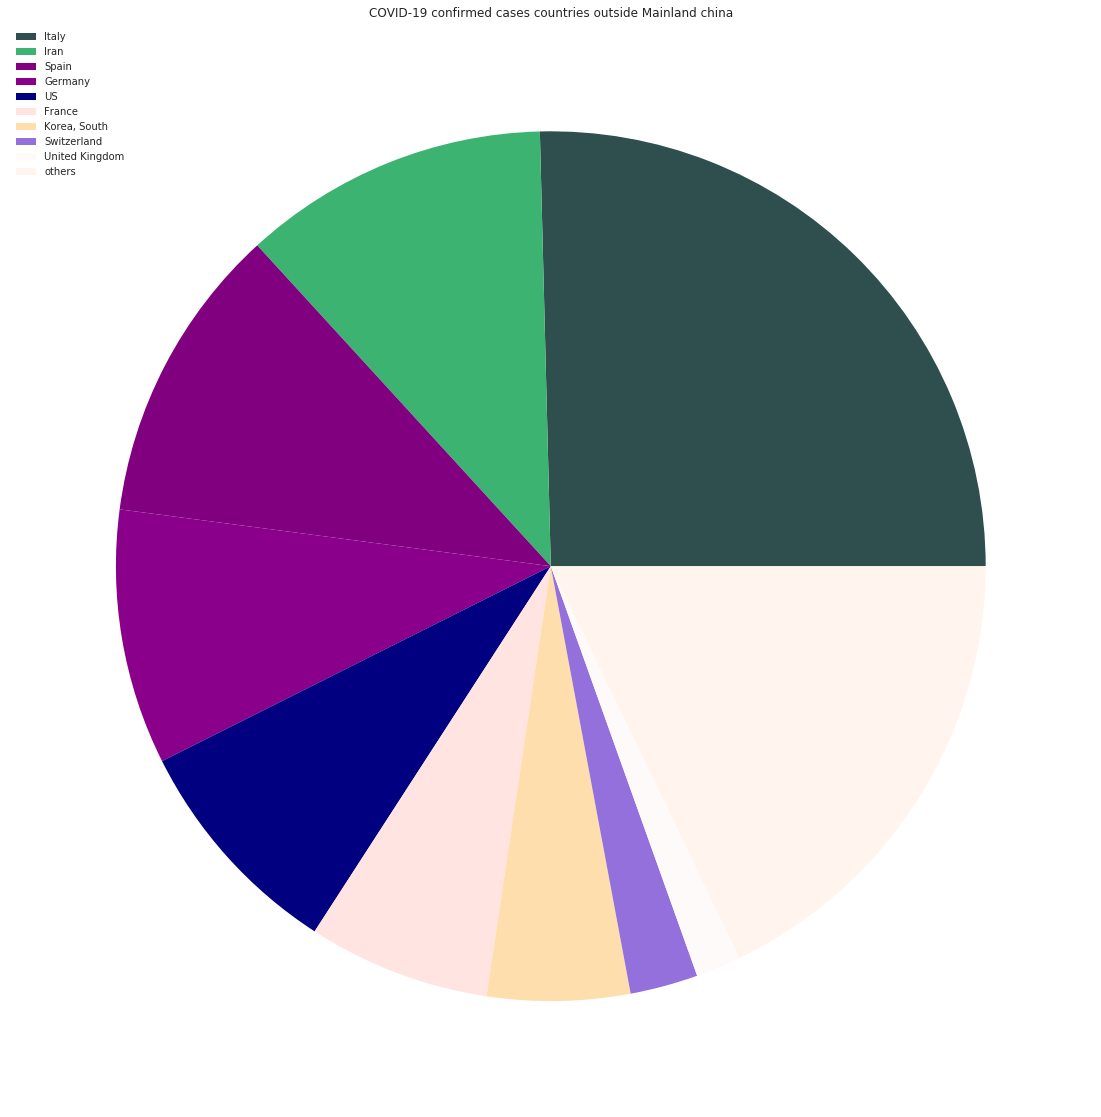

In [128]:
# create a pie chart to see the total confirmed cases in 10 different countries outside china

c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('COVID-19 confirmed cases countries outside Mainland china')
plt.pie(visual_confirmed_cases[1:], colors=c)
plt.legend(visual_unique_countries[1:], loc='best')
plt.show()

In [130]:

import math

kernel = ['poly' , 'sigmoid' , 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1 , 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma': gamma, 'epsilon': epsilon, 'shrinking': shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1,)
svm_search.fit(X_train_confirmed, y_train_confirmed)  

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   16.0s finished
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=40, n_jobs=-1,
          param_distributions={'kernel': ['poly', 'sigmoid', 'rbf'], 'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'epsilon': [0.01, 0.1, 1], 'shrinking': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=1)

In [131]:
svm_search.best_params_

{'shrinking': False, 'kernel': 'poly', 'gamma': 0.01, 'epsilon': 1, 'C': 1}

In [132]:
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forecast)

In [133]:
svm_confirmed

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma=0.01,
  kernel='poly', max_iter=-1, shrinking=False, tol=0.001, verbose=False)

In [134]:
svm_pred

array([ 38982.90508775,  38983.63259962,  38988.72518267,  39002.5479081 ,
        39029.46584709,  39073.84407083,  39140.04765052,  39232.44165733,
        39355.39116246,  39513.26123709,  39710.41695242,  39951.22337962,
        40240.0455899 ,  40581.24865442,  40979.1976444 ,  41438.257631  ,
        41962.79368543,  42557.17087886,  43225.75428249,  43972.9089675 ,
        44803.00000508,  45720.39246643,  46729.45142272,  47834.54194515,
        49040.0291049 ,  50350.27797317,  51769.65362113,  53302.52111998,
        54953.24554091,  56726.1919551 ,  58625.72543375,  60656.21104803,
        62822.01386915,  65127.49896827,  67577.03141661,  70174.97628533,
        72925.69864563,  75833.56356871,  78902.93612573,  82138.18138791,
        85543.66442641,  89123.75031244,  92882.80411717,  96825.1909118 ,
       100955.27576751, 105277.42375549, 109795.99994694, 114515.36941303,
       119439.89722496, 124573.94845391, 129921.88817107, 135488.08144763,
       141276.89335479, 1

MAE: 25534.568053310522
MSE: 1107254180.5752325


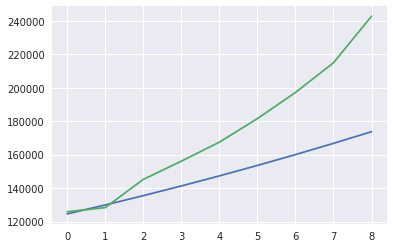

In [135]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

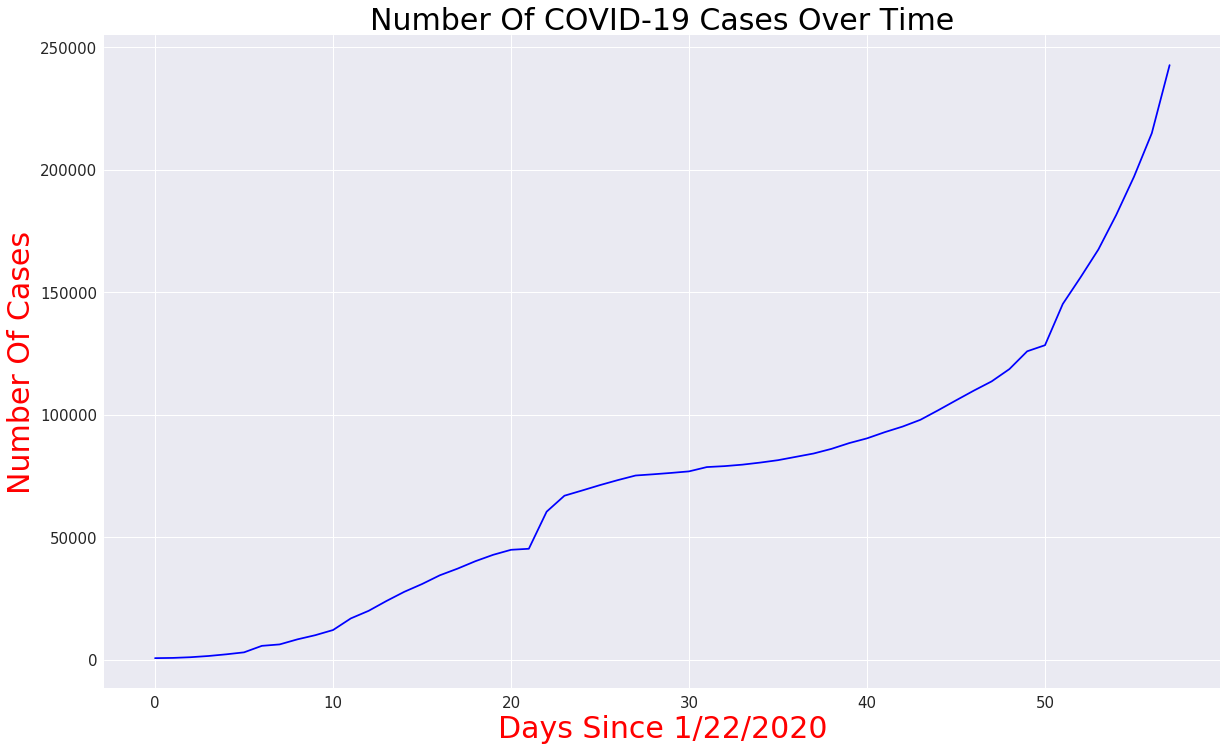

In [136]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases, color='blue')
plt.title('Number Of COVID-19 Cases Over Time', size=30,color='black')
plt.xlabel('Days Since 1/22/2020', size=30, color='red')
plt.ylabel('Number Of Cases', size=30,color='red')
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

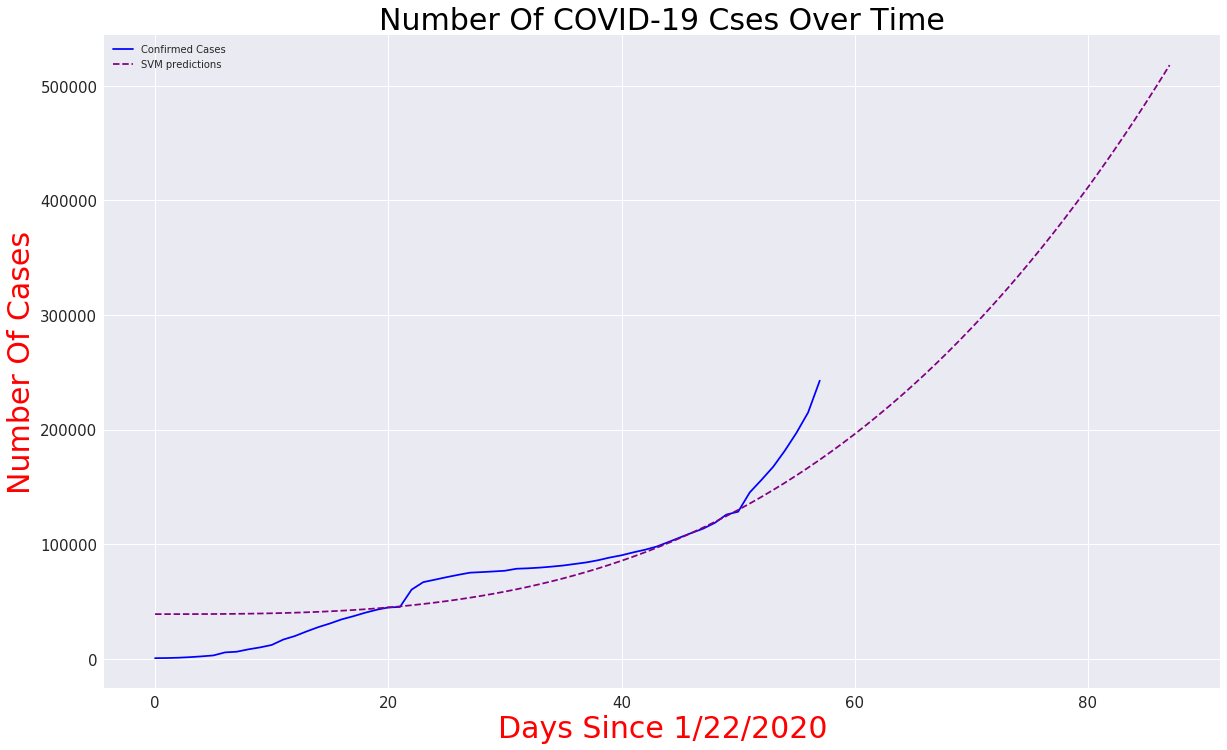

In [137]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases, color='blue')
plt.plot(future_forecast, svm_pred, linestyle='dashed', color='purple')
plt.title('Number Of COVID-19 Cses Over Time', size=30,color='black')
plt.xlabel('Days Since 1/22/2020', size=30, color='red')
plt.ylabel('Number Of Cases', size=30,color='red')
plt.legend(['Confirmed Cases', 'SVM predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [138]:
print('SVM Future Predictions: ')
set(zip(future_forecast_dates[-30:], svm_pred[-30:]))

SVM Future Predictions: 


{('03/20/2020', 180929.2000265725),
 ('03/21/2020', 188398.56434110398),
 ('03/22/2020', 196125.46785572747),
 ('03/23/2020', 204114.27564163093),
 ('03/24/2020', 212369.35277000236),
 ('03/25/2020', 220895.06431202978),
 ('03/26/2020', 229695.7753389011),
 ('03/27/2020', 238775.85092180438),
 ('03/28/2020', 248139.6561319277),
 ('03/29/2020', 257791.5560404588),
 ('03/30/2020', 267735.91571858595),
 ('03/31/2020', 277977.10023749707),
 ('04/01/2020', 288519.4746683802),
 ('04/02/2020', 299367.4040824232),
 ('04/03/2020', 310525.2535508142),
 ('04/04/2020', 321997.3881447411),
 ('04/05/2020', 333788.17293539195),
 ('04/06/2020', 345901.9729939548),
 ('04/07/2020', 358343.1533916175),
 ('04/08/2020', 371116.07919956825),
 ('04/09/2020', 384225.11548899504),
 ('04/10/2020', 397674.6273310856),
 ('04/11/2020', 411468.97979702824),
 ('04/12/2020', 425612.53795801074),
 ('04/13/2020', 440109.6668852212),
 ('04/14/2020', 454964.73164984764),
 ('04/15/2020', 470182.0973230779),
 ('04/16/2020'

# USING LINEAR REGRESSION MODEL TO MAKE PREDICTIONS

In [139]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:', mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 43871.20524943312
MSE: 2881068380.844697


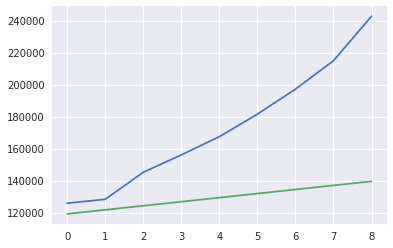

In [140]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)

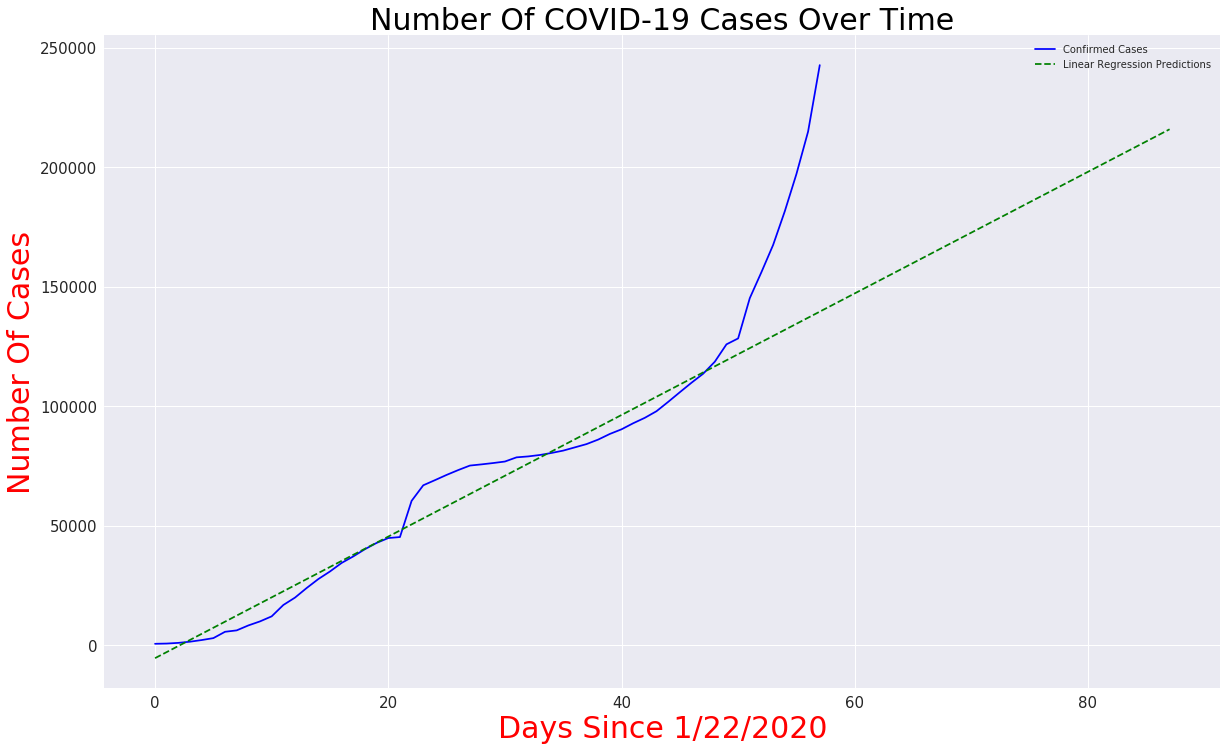

In [141]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases, color='blue')
plt.plot(future_forecast, linear_pred, linestyle='dashed', color='green')
plt.title('Number Of COVID-19 Cases Over Time', size=30,color='black')
plt.xlabel('Days Since 1/22/2020', size=30, color='red')
plt.ylabel('Number Of Cases', size=30,color='red')
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# PREDICTION FOR THE NEXT 30DAYS Linear WITH Regression

In [142]:
print('Linear Regression Future Prediction: ')
print(linear_pred[-30:])

Linear Regression Future Prediction: 
[[142096.1855102 ]
 [144640.15255102]
 [147184.11959184]
 [149728.08663265]
 [152272.05367347]
 [154816.02071429]
 [157359.9877551 ]
 [159903.95479592]
 [162447.92183673]
 [164991.88887755]
 [167535.85591837]
 [170079.82295918]
 [172623.79      ]
 [175167.75704082]
 [177711.72408163]
 [180255.69112245]
 [182799.65816327]
 [185343.62520408]
 [187887.5922449 ]
 [190431.55928571]
 [192975.52632653]
 [195519.49336735]
 [198063.46040816]
 [200607.42744898]
 [203151.3944898 ]
 [205695.36153061]
 [208239.32857143]
 [210783.29561224]
 [213327.26265306]
 [215871.22969388]]


# Number Of COVID-19 Cases Over Time

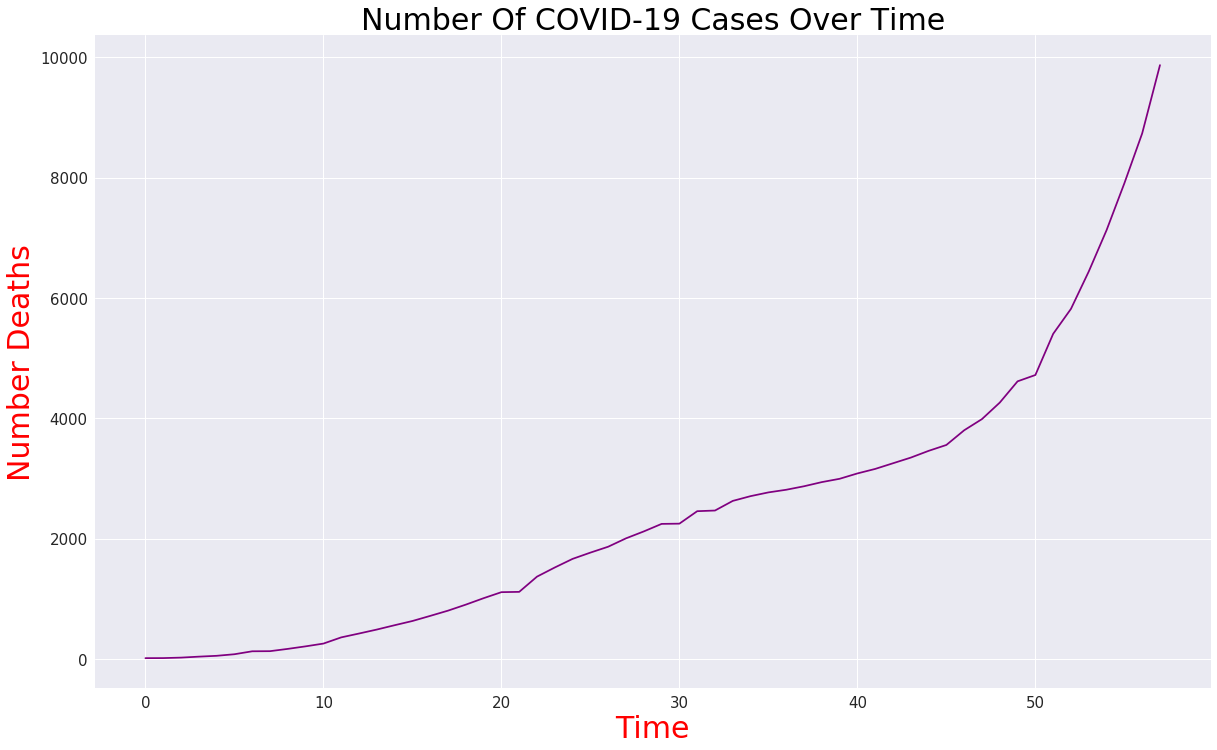

In [143]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='purple')
plt.title('Number Of COVID-19 Cases Over Time', size=30,color='black')
plt.xlabel('Time', size=30, color='red')
plt.ylabel('Number Deaths', size=30,color='red')
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# Mortality Rate Of COVID-19 Over Time

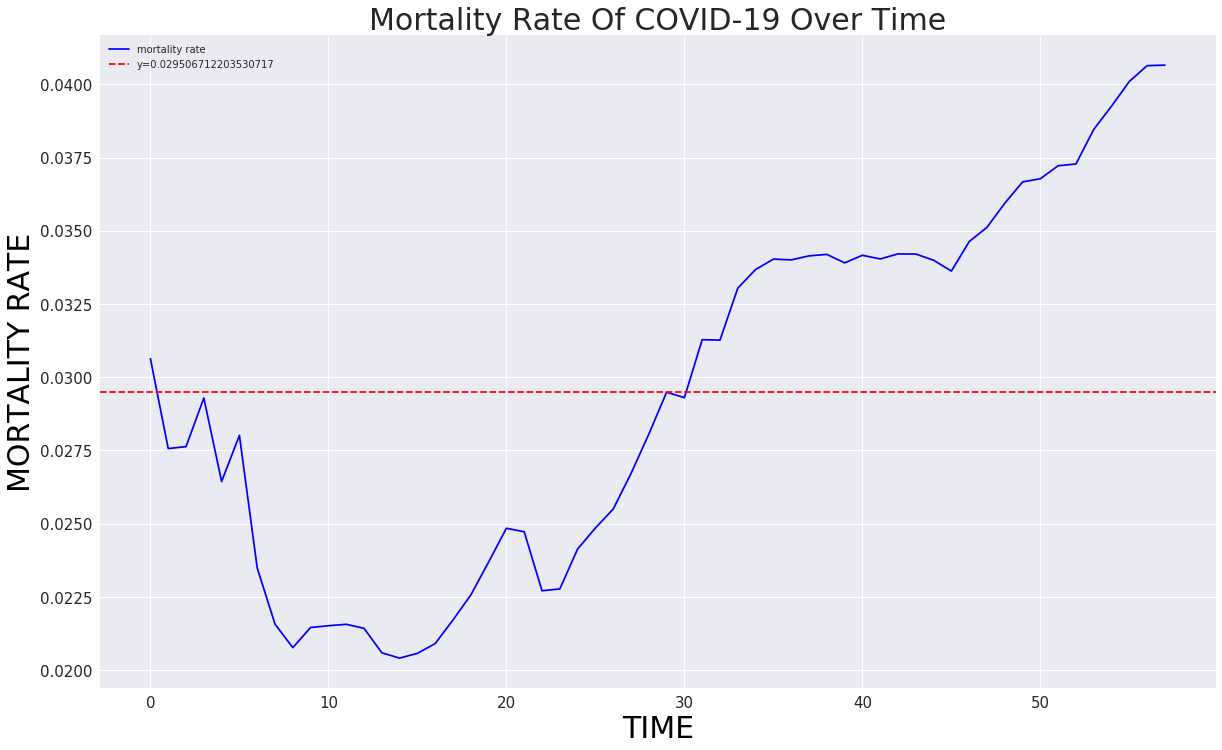

In [144]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='blue')
plt.axhline(y = mean_mortality_rate, linestyle='--', color='red')
plt.title('Mortality Rate Of COVID-19 Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)])
plt.xlabel('TIME', size=30, color='black')
plt.ylabel('MORTALITY RATE', size=30, color='black')
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# Number Of Recovered COVID-19 Over Time

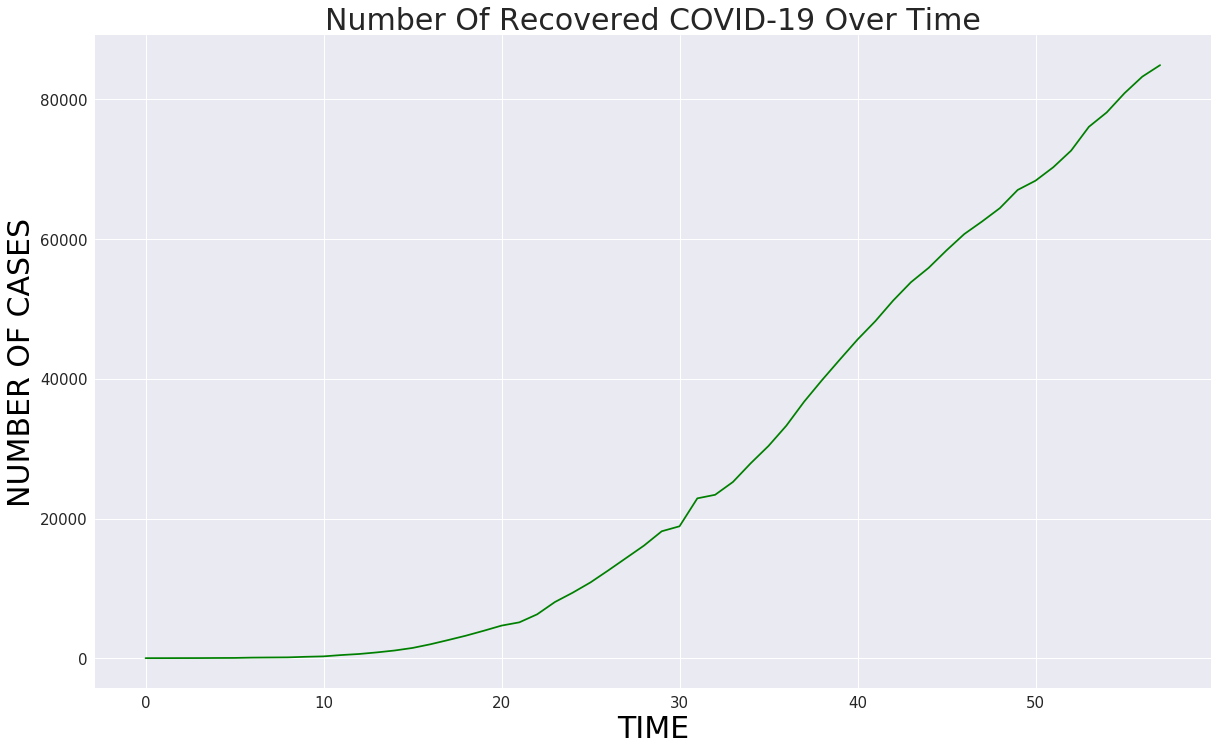

In [145]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('Number Of Recovered COVID-19 Over Time', size=30)
plt.xlabel('TIME', size=30, color='black')
plt.ylabel('NUMBER OF CASES', size=30, color='black')
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# NUMBER OF COVID-19 CASES RECOVERED VS THE NUMBER OF DEATHS

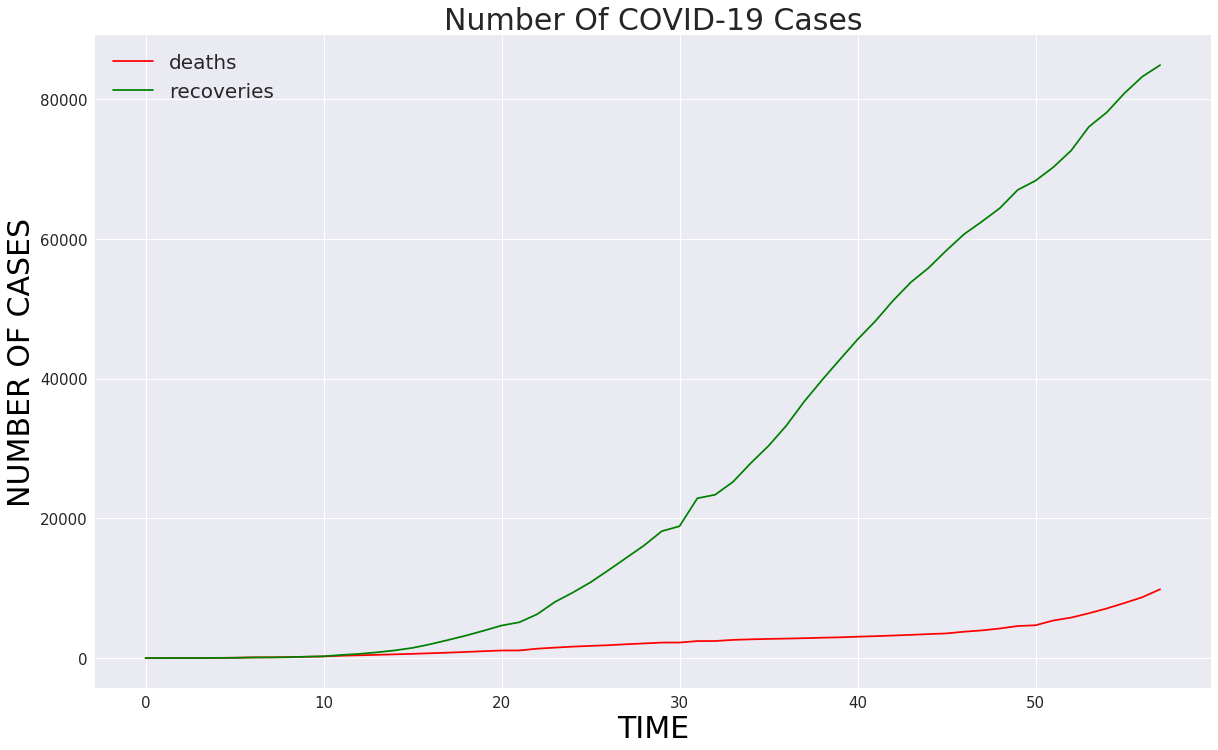

In [146]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['deaths', 'recoveries'], loc='best', fontsize=20)
plt.title('Number Of COVID-19 Cases', size=30)
plt.xlabel('TIME', size=30, color='black')
plt.ylabel('NUMBER OF CASES', size=30, color='black')
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# COVID-19 DEATHS VS COVID-19 RECOVERIES IN A SINGLE CURVE 

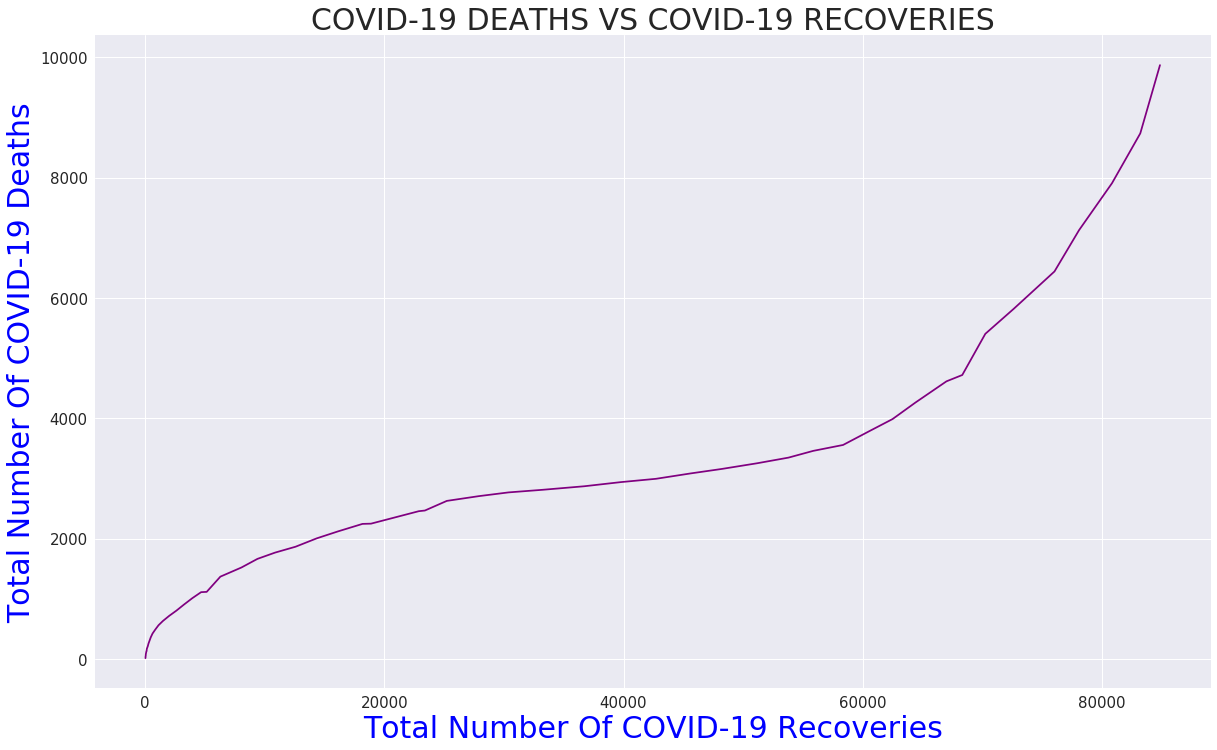

In [147]:
plt.figure(figsize=(20, 12))
plt.plot(total_recovered, total_deaths, color='purple')
plt.title('COVID-19 DEATHS VS COVID-19 RECOVERIES', size=30)
plt.xlabel('Total Number Of COVID-19 Recoveries', size=30, color='b')
plt.ylabel('Total Number Of COVID-19 Deaths', size=30, color='b')
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [ ]:
#End